In [41]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
# Cargar el dataset
file_path = '/Users/walte/Documents/SEXTO SEMESTRE/ANALISIS DE DATOS/tarea 4/Anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv'
data = pd.read_csv(file_path)

In [25]:
# Inspección inicial de los datos
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB
None
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [43]:
# Preprocesamiento: eliminar columnas no necesarias y escalar los datos
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Seleccionar solo las variables numéricas relevantes

In [45]:
# Escalar los datos para mejorar el desempeño del modelo
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [47]:
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
silhouette_scores = []
for k in range(2, 11):  # Probar con 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

C:\Users\walte\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\walte\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\walte\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\walte\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Inercia')

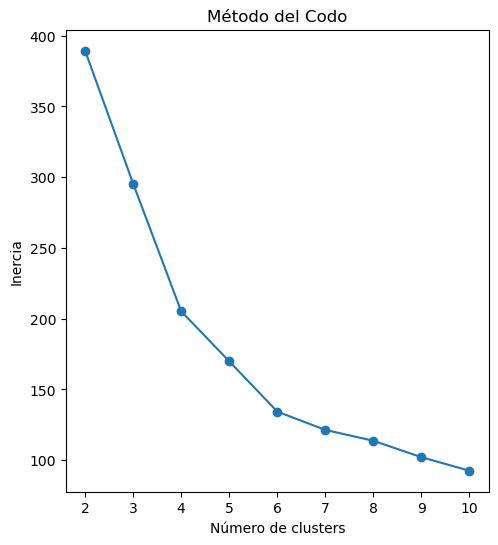

In [49]:
# Graficar la "curva del codo" para encontrar el número óptimo de clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

Text(0, 0.5, 'Silhouette Score')

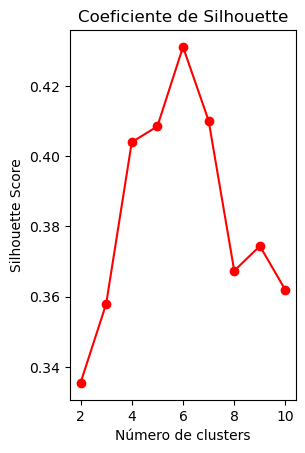

In [51]:
# Graficar el coeficiente de Silhouette
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')

In [53]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [55]:
# Elegir el número de clusters basado en la gráfica (por ejemplo, 5)
optimal_k = 5

In [57]:
# Entrenar el modelo K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

C:\Users\walte\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


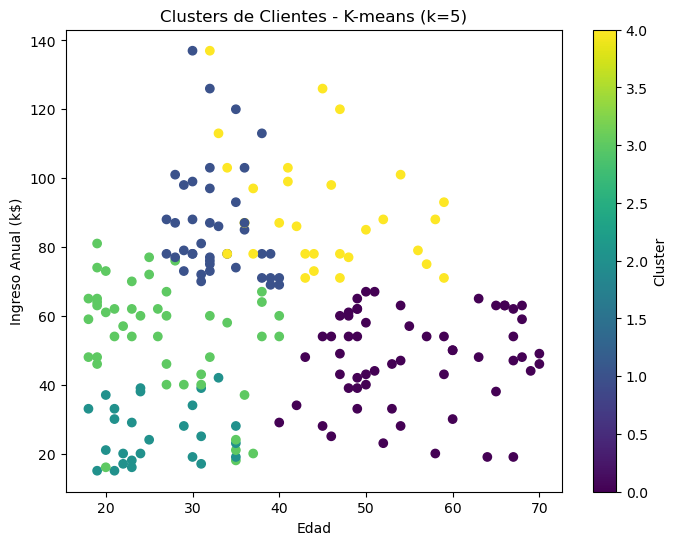

In [59]:
# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title(f'Clusters de Clientes - K-means (k={optimal_k})')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.colorbar(label='Cluster')
plt.show()

In [61]:
# Evaluar el modelo usando el Coeficiente de Silhouette
sil_score = silhouette_score(data_scaled, data['Cluster'])
print(f'Coeficiente de Silhouette: {sil_score:.3f}')

Coeficiente de Silhouette: 0.408
